# RAMP: Predicting french parliament members' political affiliation based on demographic and legislative behavior data 
*Lambi Michalopoulos, Hugo pointier, Vivek Ashokan, Nathan Maligeay, Romain Poupon*

## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Requirements](#requirements)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>


## The dataset <a class="anchor" id="dataset"></a>

## Requirements <a class="anchor" id="requirements"></a>

In [40]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Download Data

In [2]:
# Uncomment the following line to download data:
!python download_data.py

=> File saved as data/deputes-active.csv


## Prepare Data

In [6]:
!python prepare_data.py

Train dataset created
Test dataset created


## Data Exploration <a class="anchor" id="exploration"></a>

### Training data 

Here we load the whole .csv file but we will select only the geochemical variables in order to train models for this challenge.

In [7]:
df = pd.read_csv('data/deputes-active.csv')
df

,id,legislature,civ,nom,prenom,villeNaissance,naissance,age,groupe,groupeAbrev,...,twitter,facebook,website,nombreMandats,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite,dateMaj
0,PA1008,16,M.,David,Alain,Libourne,1949-06-02,74,Socialistes et apparentés,SOC-A,...,@AlainDavid_AN,AlainDavidAssembleeNationale,alain-david.com,2,7 ans,0.24,0.75,0.978,0.363,2024-03-02
1,PA1206,16,M.,Dupont-Aignan,Nicolas,Paris,1961-03-07,62,Non inscrit,NI,...,@dupontaignan,nicolasdupontaignan,NaN,5,22 ans,0.05,0.00,0.922,0.157,2024-03-02
2,PA1327,16,M.,Forissier,Nicolas,Paris,1961-02-17,63,Les Républicains,LR,...,@N_Forissier,nicolas.forissier,NaN,3,12 ans,0.10,0.00,0.907,0.858,2024-03-02
3,PA1567,16,M.,Guedj,Jérôme,Pantin,1972-01-23,52,Socialistes et apparentés,SOC-A,...,@JeromeGuedj,jerome.guedj,jerome-guedj.fr/,3,3 ans,0.19,0.42,0.992,0.302,2024-03-02
4,PA1592,16,M.,Habib,David,Paris,1961-03-16,62,Non inscrit,NI,...,@DavidDhabib,DavidHabib64,www.david-habib.fr,5,22 ans,0.04,0.01,0.899,0.913,2024-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,PA805166,16,Mme,Bergantz,Anne,Chalons-sur-Saône,1968-09-17,55,Démocrate (MoDem et Indépendants),DEM,...,NaN,NaN,NaN,1,1 an,0.45,0.77,0.985,0.971,2024-03-02
573,PA817203,16,Mme,Miller,Laure,Reims,1983-12-25,40,Renaissance,RE,...,NaN,NaN,NaN,1,1 an,0.29,0.33,0.997,0.997,2024-03-02
574,PA817211,16,M.,Pilato,René,Lagny-sur Marne,1962-08-31,61,La France insoumise - Nouvelle Union Populaire...,LFI-NUPES,...,@PilatoRene,René Pilato,renepilato.fr/,1,1 an,0.33,0.35,0.989,0.249,2024-03-02
575,PA822617,16,Mme,Froger,Martine,Blois,1961-06-11,62,"Libertés, Indépendants, Outre-mer et Territoires",LIOT,...,MartineFrogerAN,NaN,NaN,1,1 an,0.11,0.17,0.909,0.598,2024-03-02


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

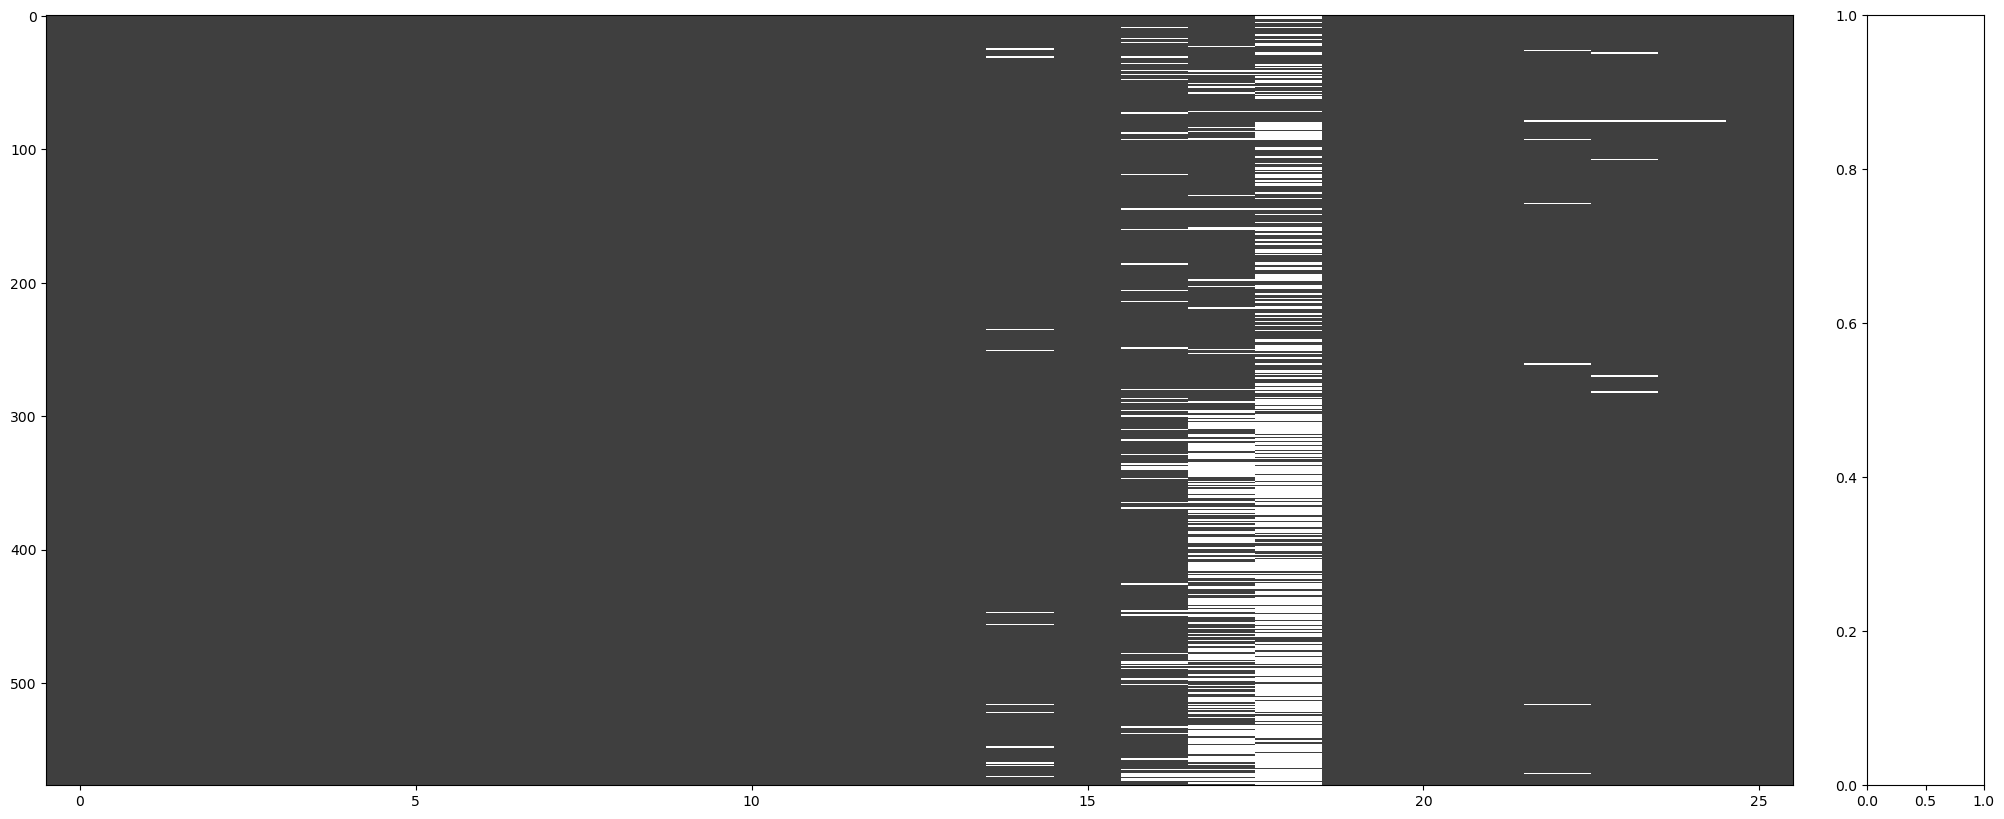

In [12]:
# Missingness
msno.matrix(df)

<Axes: >

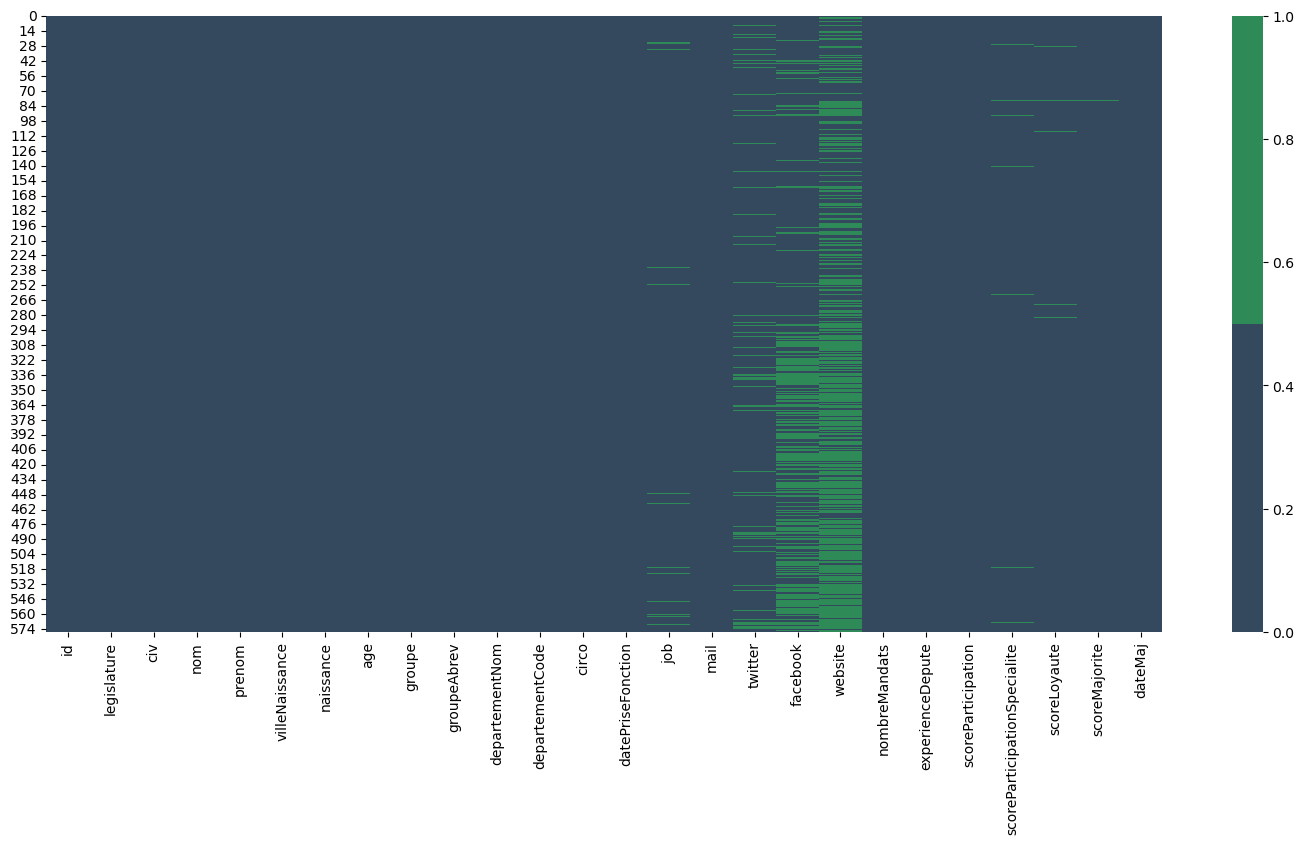

In [13]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

## Labels
The target variable is in the column groupe since we classify .

In [15]:
df.groupe.unique().shape, df.groupe.unique()

((11,),
 array(['Socialistes et apparentés', 'Non inscrit', 'Les Républicains',
        'Renaissance', 'Libertés, Indépendants, Outre-mer et Territoires',
        'Gauche démocrate et républicaine - NUPES',
        'Horizons et apparentés', 'Démocrate (MoDem et Indépendants)',
        'Écologiste - NUPES',
        'La France insoumise - Nouvelle Union Populaire écologique et sociale',
        'Rassemblement National'], dtype=object))

There are 11 groups to classify deputees from.

In [27]:
df.groupe.value_counts(dropna=False)

groupe
Renaissance                                                             169
Rassemblement National                                                   88
La France insoumise - Nouvelle Union Populaire écologique et sociale     75
Les Républicains                                                         62
Démocrate (MoDem et Indépendants)                                        50
Socialistes et apparentés                                                31
Horizons et apparentés                                                   30
Libertés, Indépendants, Outre-mer et Territoires                         22
Gauche démocrate et républicaine - NUPES                                 22
Écologiste - NUPES                                                       22
Non inscrit                                                               6
Name: count, dtype: int64

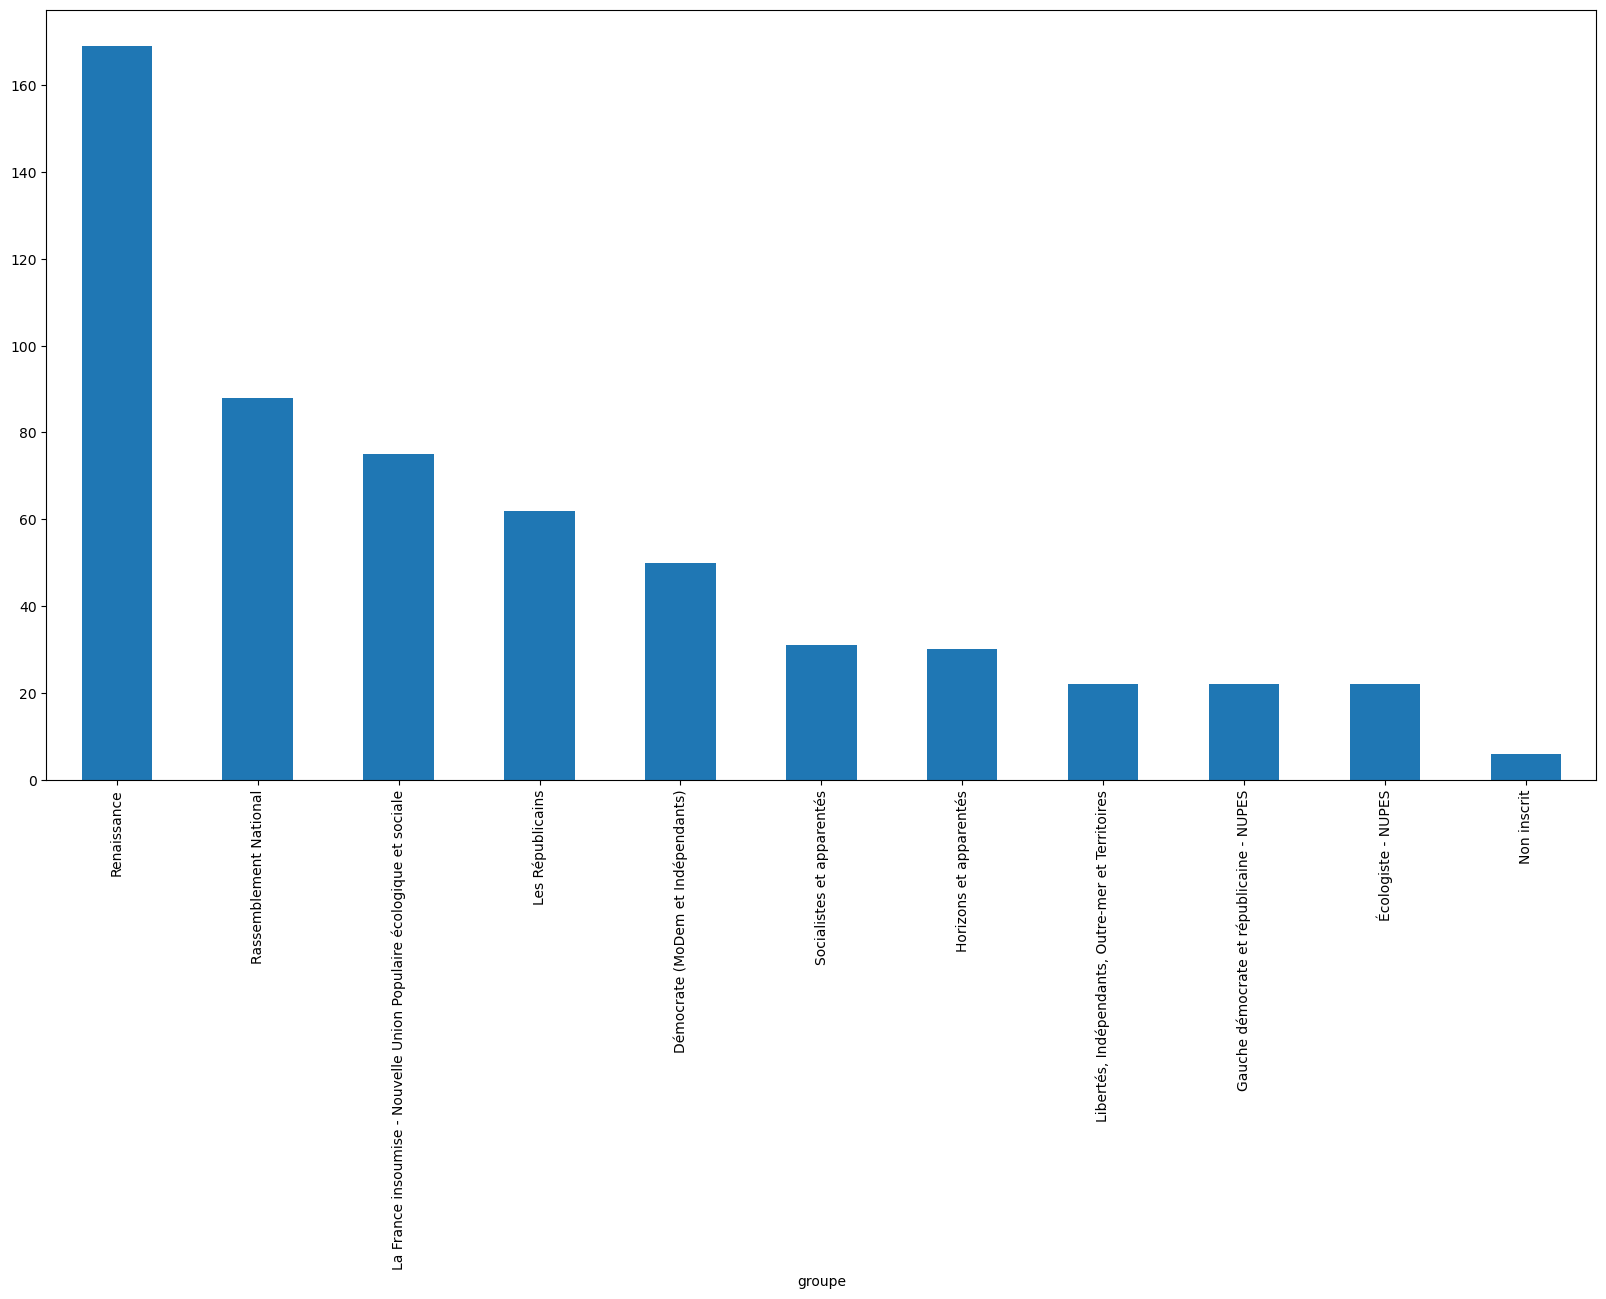

In [17]:
ax_pub = df.groupe.value_counts(normalize=False).plot(kind='bar', figsize=(20, 10))

You can see that we deal with an imbalanced dataset, where some classes have  almost 30 times more observations than others. 

### Sample groups

In [19]:
# Distribution of groups in each class
group_class_counts = df.groupby(['groupe', 'id']).size().unstack(fill_value=0)
group_class_counts

id,PA1008,PA1206,PA1327,PA1567,PA1592,PA1630,PA1874,PA2449,PA266788,PA266793,...,PA796090,PA796106,PA796114,PA796118,PA796132,PA805166,PA817203,PA817211,PA822617,PA942
groupe,,,,,,,,,,,,,,,,,,,,,
Démocrate (MoDem et Indépendants),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Gauche démocrate et républicaine - NUPES,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Horizons et apparentés,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La France insoumise - Nouvelle Union Populaire écologique et sociale,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
Les Républicains,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
"Libertés, Indépendants, Outre-mer et Territoires",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
Non inscrit,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rassemblement National,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Renaissance,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


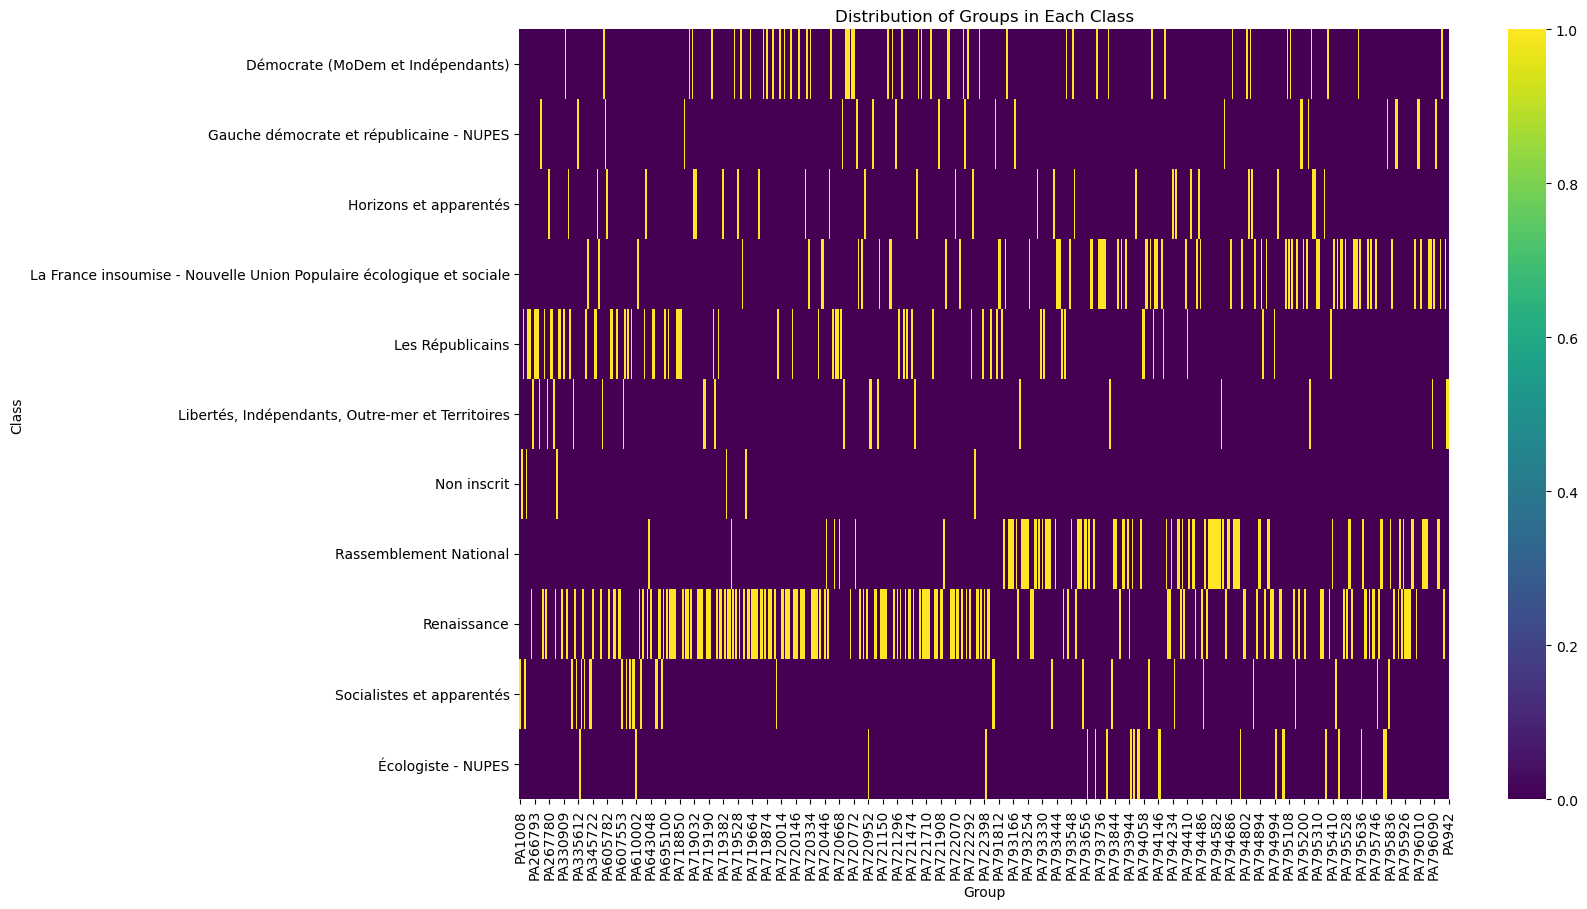

In [20]:
# heatmap of the distribution of groups in each class
plt.figure(figsize=(15, 10))
sns.heatmap(group_class_counts, cmap="viridis")
plt.title('Distribution of Groups in Each Class')
plt.xlabel('Group')
plt.ylabel('Class')
plt.show()

## Base model <a class="anchor" id="base_model"></a>

### Cleaning data

In [1]:
!python prepare_data.py

Train dataset created
Test dataset created


In [5]:
train = pd.read_csv('data/train.csv')
train

,id,legislature,civ,nom,prenom,villeNaissance,naissance,age,groupe,groupeAbrev,...,twitter,facebook,website,nombreMandats,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite,dateMaj
0,PA795966,16,1,Rambaud,Stéphane,Alger,1960-04-05,1.0,Rassemblement National,RN,...,@stephan1Rambaud,NaN,NaN,1,730.0,0.27,0.20,0.972,0.258,2024-03-02
1,PA795844,16,0,Erodi,Karen,Toulouse,1977-02-04,1.0,La France insoumise - Nouvelle Union Populaire...,LFI-NUPES,...,@KarenErodi,karenerodi2022,NaN,1,730.0,0.27,0.41,0.999,0.253,2024-03-02
2,PA736201,16,0,Taillé-Polian,Sophie,Ermont,1974-10-04,1.0,Écologiste - NUPES,ECOLO,...,@STaillePolian,NaN,NaN,1,730.0,0.14,0.28,0.977,0.253,2024-03-02
3,PA267324,16,1,Gaultier,Jean-Jacques,Épinal,1963-07-13,1.0,Les Républicains,LR,...,@JJ_Gaultier,Jean-Jacques-Gaultier-1088303261286818,NaN,4,6205.0,0.09,0.02,0.938,0.758,2024-03-02
4,PA794762,16,0,Dogor-Such,Sandrine,Tours,1970-11-08,1.0,Rassemblement National,RN,...,@Sandrine_Dogor,NaN,NaN,1,730.0,0.40,0.65,0.982,0.315,2024-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,PA342415,16,0,Battistel,Marie-Noëlle,Grenoble,1956-08-20,1.0,Socialistes et apparentés,SOC-A,...,@BattistelMarie,marienoelle.battistel,www.marienoelle-battistel.fr,4,5110.0,0.24,0.37,0.989,0.379,2024-03-02
452,PA718910,16,0,Colomb-Pitollat,Claire,Marseille,1979-09-17,1.0,Renaissance,RE,...,@clairepitollat,clairepitollat,clairepitollat2022.com,2,2555.0,0.15,0.08,0.996,0.996,2024-03-02
453,PA643089,16,1,Thiériot,Jean-Louis,Paris 14ème,1969-06-26,1.0,Les Républicains,LR,...,@JL_Thieriot,JLTHIERIOT,NaN,2,2190.0,0.09,0.83,0.945,0.829,2024-03-02
454,PA794386,16,0,Métayer,Lysiane,Abidjan,1963-08-07,1.0,Renaissance,RE,...,@Lysiane_Metayer,NaN,NaN,1,730.0,0.43,0.61,0.993,0.993,2024-03-02


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

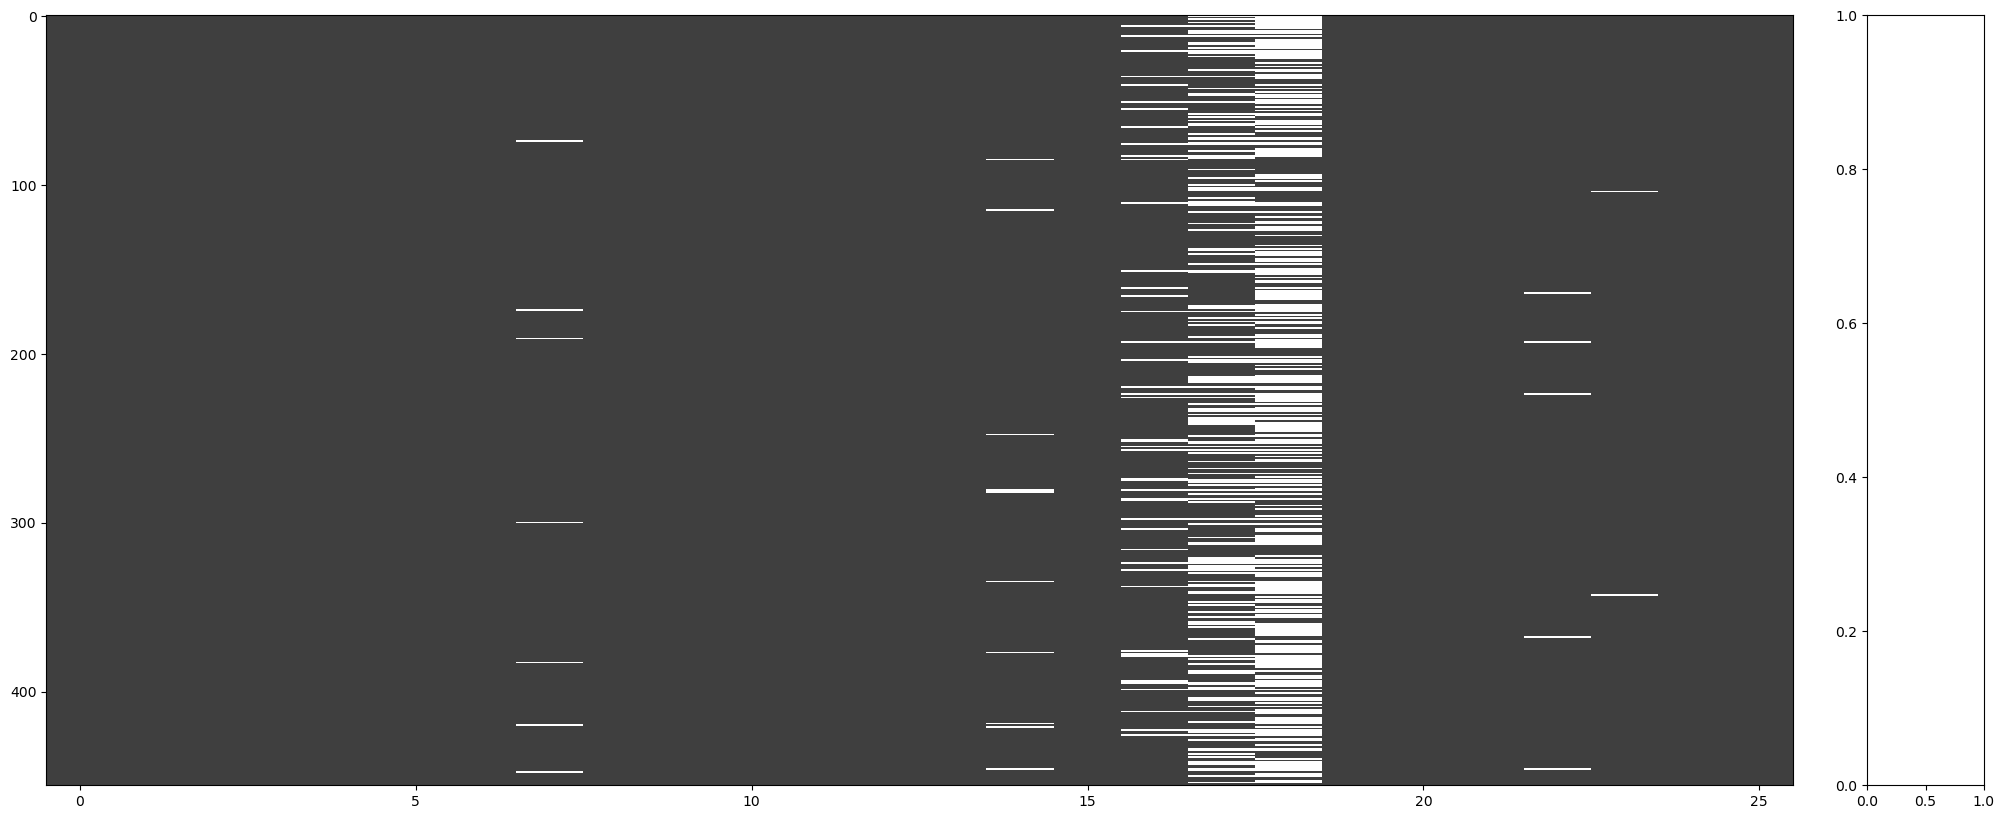

In [5]:
msno.matrix(train)

In [4]:
test = pd.read_csv('data/test.csv')
test

,id,legislature,civ,nom,prenom,villeNaissance,naissance,age,groupe,groupeAbrev,...,twitter,facebook,website,nombreMandats,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite,dateMaj
0,PA331582,16,1,Vigier,Philippe,Valence,1958-02-03,1.0,Démocrate (MoDem et Indépendants),DEM,...,@VigierPhilippe,deputephilippevigier,NaN,4,5840.0,0.24,0.43,NaN,0.965,2024-03-02
1,PA719866,16,0,Abadie,Caroline,Saint Martin D'Heres,1976-09-07,1.0,Renaissance,RE,...,@AbadieCaroline,caroline.abadie.16,www.abadiecaroline.fr,2,2555.0,0.36,0.68,0.993,0.993,2024-03-02
2,PA610654,16,1,Nilor,Jean-Philippe,FORT DE FRANCE,1965-05-15,1.0,La France insoumise - Nouvelle Union Populaire...,LFI-NUPES,...,NaN,Jean-Philippe-NILOR-297068797117195,jpnilor.com,3,4380.0,0.16,0.27,0.971,0.130,2024-03-02
3,PA719756,16,0,Le Nabour,Christine,Noisy-le-Sec,1964-10-28,1.0,Renaissance,RE,...,@ChrisCloarec,ChristineCloarecLaRem,www.christinecloarec.fr,2,2555.0,0.50,0.76,0.996,0.996,2024-03-02
4,PA720100,16,1,Pradié,Aurélien,Cahors,1986-03-14,0.0,Les Républicains,LR,...,@AurelienPradie,aurelien.pradie,www.aurelienpradie.fr,2,2555.0,0.06,0.07,0.852,0.708,2024-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,PA719266,16,1,Cubertafon,Jean-Pierre,Lanouaille,1948-02-05,1.0,Démocrate (MoDem et Indépendants),DEM,...,NaN,jeanpierre.cubertafon,NaN,2,2555.0,0.18,0.55,0.987,0.980,2024-03-02
110,PA793146,16,1,Dragon,Nicolas,Laon,1977-04-19,1.0,Rassemblement National,RN,...,@NicolasDragon,nicolasdragon,www.nicolasdragon.com,1,730.0,0.52,0.86,0.996,0.338,2024-03-02
111,PA793166,16,1,Dessigny,Jocelyn,Noisy Le Grand,1981-06-29,1.0,Rassemblement National,RN,...,@JocelynDessigny,NaN,NaN,1,730.0,0.69,0.66,0.967,0.346,2024-03-02
112,PA266797,16,1,Gosselin,Philippe,Carentan,1966-10-23,1.0,Les Républicains,LR,...,@phgosselin,phgosselin,www.philippegosselin.fr,4,6205.0,0.17,0.28,0.943,0.723,2024-03-02


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

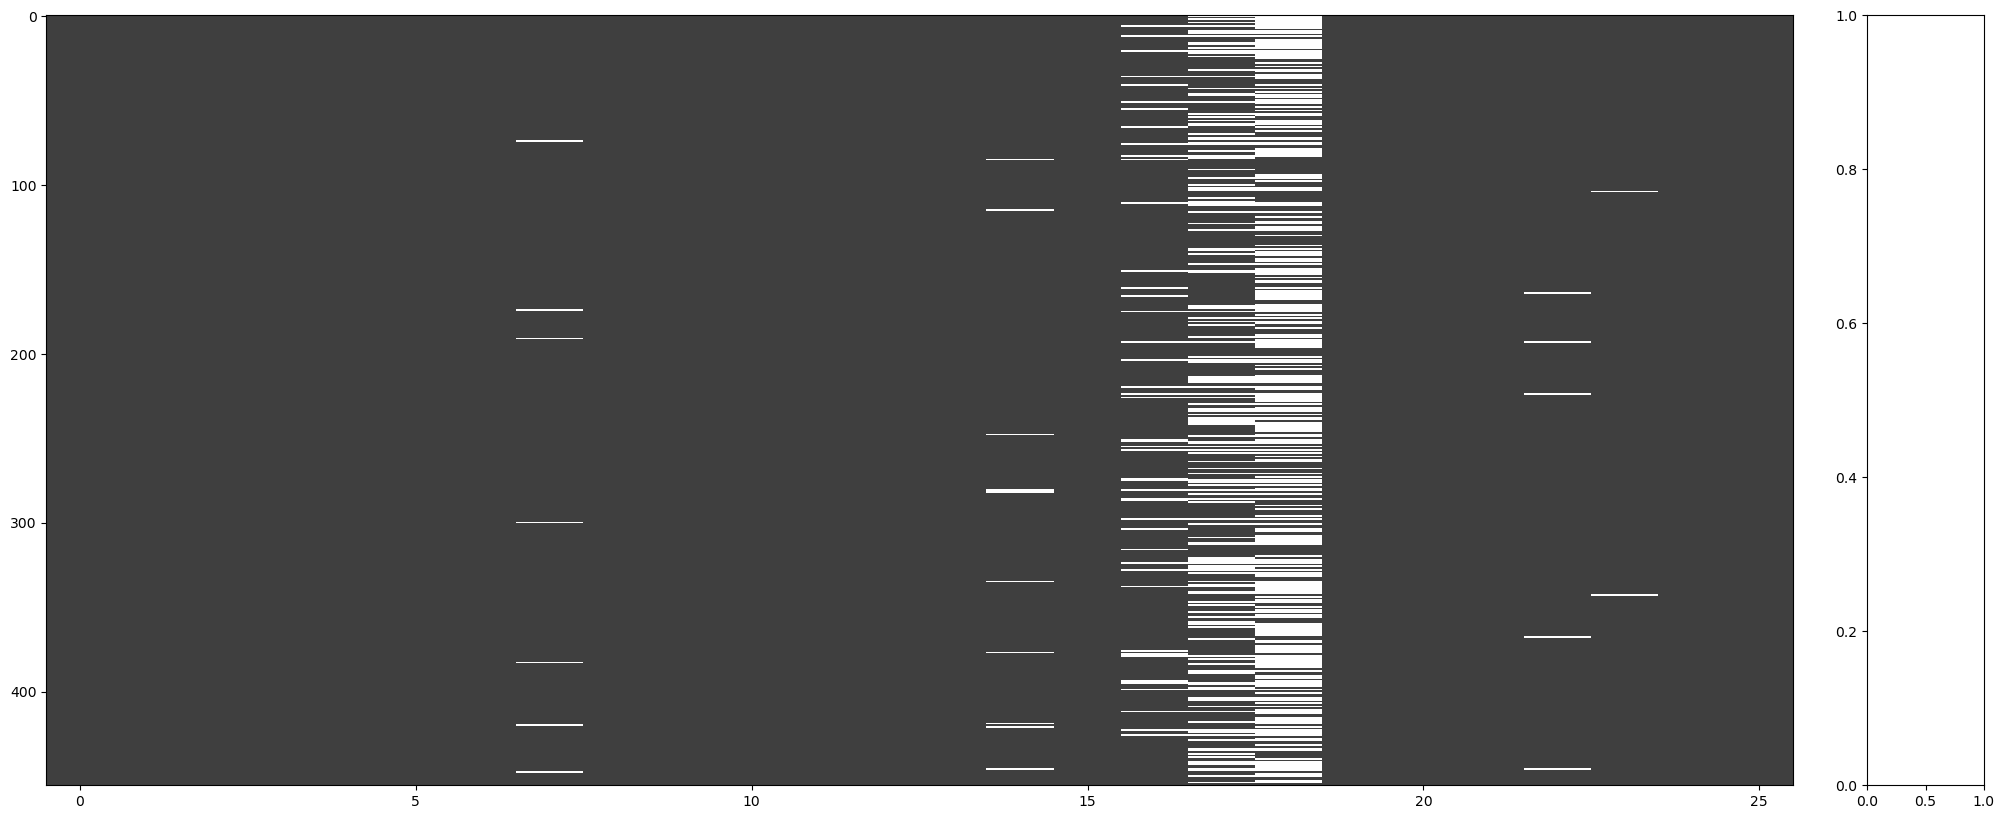

In [29]:
msno.matrix(test)

In [31]:
columns_to_keep = ['civ',
                   'age',
                   'experienceDepute',
                   'scoreParticipation',
                   'scoreParticipationSpecialite',
                   'scoreLoyaute',
                   'scoreMajorite']

In [35]:
X_train = train.loc[:, columns_to_keep]
X_train

,civ,age,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite
0,1,1.0,730.0,0.27,0.20,0.972,0.258
1,0,1.0,730.0,0.27,0.41,0.999,0.253
2,0,1.0,730.0,0.14,0.28,0.977,0.253
3,1,1.0,6205.0,0.09,0.02,0.938,0.758
4,0,1.0,730.0,0.40,0.65,0.982,0.315
...,...,...,...,...,...,...,...
451,0,1.0,5110.0,0.24,0.37,0.989,0.379
452,0,1.0,2555.0,0.15,0.08,0.996,0.996
453,1,1.0,2190.0,0.09,0.83,0.945,0.829
454,0,1.0,730.0,0.43,0.61,0.993,0.993


In [36]:
X_test = test.loc[:, columns_to_keep]
X_test

,civ,age,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite
0,1,1.0,5840.0,0.24,0.43,NaN,0.965
1,0,1.0,2555.0,0.36,0.68,0.993,0.993
2,1,1.0,4380.0,0.16,0.27,0.971,0.130
3,0,1.0,2555.0,0.50,0.76,0.996,0.996
4,1,0.0,2555.0,0.06,0.07,0.852,0.708
...,...,...,...,...,...,...,...
109,1,1.0,2555.0,0.18,0.55,0.987,0.980
110,1,1.0,730.0,0.52,0.86,0.996,0.338
111,1,1.0,730.0,0.69,0.66,0.967,0.346
112,1,1.0,6205.0,0.17,0.28,0.943,0.723


Labels for the train and test sets.
We use a dictionary to store the correspondence between categories and integer labels for this dataset.

In [28]:
# Hard code int_to_cat dict and retrieve cat_to_int with dictionary comprehension to use in all needed files
int_to_cat = {
    0: "SOC-A",
    1: "LR",
    2: "RE",
    3: "LIOT",
    4: "HOR",
    5: "DEM",
    6: "LFI-NUPES",
    7: "GDR-NUPES",
    8: "RN",
    9: "ECOLO",
}

cat_to_int = {v: k for k, v in int_to_cat.items()}


In [29]:
y_train = np.array(train["groupeAbrev"].map(cat_to_int).fillna(-1).astype("int8"))
y_train, y_train.shape

(array([8, 6, 9, 1, 8, 8, 1, 2, 2, 3, 4, 2, 7, 5, 8, 3, 2, 0, 5, 6, 5, 0,
        8, 3, 2, 3, 2, 2, 2, 2, 8, 4, 9, 2, 2, 3, 6, 4, 9, 2, 5, 5, 5, 0,
        2, 6, 2, 2, 2, 0, 0, 7, 4, 6, 1, 5, 6, 1, 1, 8, 2, 0, 7, 5, 8, 2,
        4, 4, 8, 0, 4, 2, 2, 9, 0, 2, 2, 2, 1, 5, 8, 5, 1, 5, 2, 1, 6, 5,
        0, 2, 7, 3, 5, 5, 6, 2, 0, 2, 1, 6, 4, 5, 7, 8, 4, 8, 8, 2, 8, 2,
        2, 8, 5, 2, 9, 1, 6, 9, 2, 2, 2, 3, 2, 6, 8, 8, 2, 8, 2, 2, 2, 2,
        6, 1, 0, 2, 8, 2, 1, 6, 6, 6, 2, 2, 6, 2, 2, 5, 2, 1, 1, 8, 2, 6,
        2, 2, 9, 6, 5, 2, 6, 8, 2, 1, 2, 8, 7, 8, 2, 8, 5, 2, 6, 6, 8, 2,
        2, 0, 1, 8, 4, 8, 2, 4, 0, 2, 2, 2, 2, 2, 8, 6, 0, 7, 4, 8, 9, 6,
        2, 1, 1, 2, 6, 2, 1, 2, 4, 1, 5, 8, 8, 0, 2, 2, 2, 0, 0, 9, 1, 9,
        5, 8, 2, 1, 2, 1, 2, 5, 5, 3, 6, 2, 8, 4, 9, 4, 8, 3, 2, 8, 0, 6,
        3, 8, 2, 4, 2, 2, 9, 8, 2, 3, 1, 1, 5, 2, 6, 7, 2, 8, 2, 8, 5, 1,
        8, 5, 2, 4, 8, 6, 6, 4, 2, 2, 4, 2, 8, 9, 8, 6, 6, 8, 1, 8, 5, 6,
        8, 7, 1, 2, 4, 7, 6, 8, 6, 6, 

In [30]:
y_test = np.array(test["groupeAbrev"].map(cat_to_int).fillna(-1).astype("int8"))
y_test, y_test.shape

(array([5, 2, 6, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 8, 2, 3, 2, 6, 2, 6, 0, 2,
        6, 2, 4, 2, 5, 1, 2, 6, 4, 6, 7, 1, 7, 8, 2, 0, 1, 2, 4, 0, 8, 0,
        2, 7, 8, 2, 8, 1, 8, 4, 6, 1, 6, 2, 3, 1, 9, 3, 5, 8, 2, 9, 2, 9,
        5, 2, 8, 0, 2, 8, 6, 5, 6, 3, 5, 5, 2, 8, 6, 2, 2, 6, 1, 9, 3, 2,
        8, 2, 6, 6, 4, 2, 6, 5, 2, 7, 8, 2, 5, 8, 1, 6, 5, 2, 9, 2, 1, 5,
        8, 8, 1, 1], dtype=int8),
 (114,))

Imputation and scaling of the data.

Here we use a SimpleImputer and a StandardScaler.

In [24]:
transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler()),]
)

Classifier: here we take a simple model, logistic regression.

In [25]:
model = LogisticRegression(max_iter=500)
clf = make_pipeline(transformer, model)

Fit the pipeline on train data:

In [37]:
clf.fit(X_train, y_train)
clf

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('logisticregression', LogisticRegression(max_iter=500))])

Evaluation on test data:

In [38]:
y_pred = clf.predict(X_test)

y_pred.shape

Accuracy score

In [41]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.79      0.73      0.76        15
           2       0.71      0.94      0.81        31
           3       0.33      0.40      0.36         5
           4       0.00      0.00      0.00         5
           5       0.50      0.18      0.27        11
           6       0.88      0.88      0.88        16
           7       0.67      0.50      0.57         4
           8       0.54      0.87      0.67        15
           9       0.00      0.00      0.00         5

    accuracy                           0.67       114
   macro avg       0.49      0.49      0.48       114
weighted avg       0.61      0.67      0.62       114



/home/romain/miniconda3/envs/ramp-tephra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/romain/miniconda3/envs/ramp-tephra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/romain/miniconda3/envs/ramp-tephra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Confusion matrix:

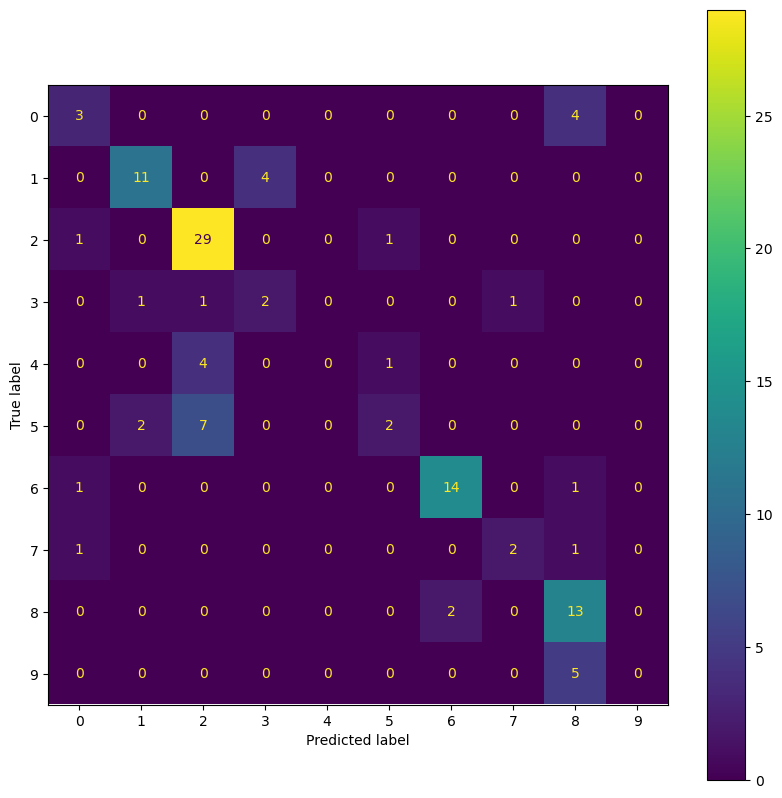

In [43]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)  

Balanced accuracy score will be used as the leaderboard score.

In [44]:
balanced_accuracy_score(y_test, y_pred)

0.49208734813573524

This is the score to beat in this challenge.

Here is the script proposed as the starting_kit:

In [45]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [ ]:
!ramp-test --submission starting_kit